In [2]:
from IPython.core.display import clear_output
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
# or
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet101', pretrained=True)
model.eval()
clear_output()

In [3]:
!gdown --id 1tJBw-auxThtoX_7F7NdPmB3yxkMfgwfY

Downloading...
From: https://drive.google.com/uc?id=1tJBw-auxThtoX_7F7NdPmB3yxkMfgwfY
To: /content/764620_1_w_570.jpg
100% 123k/123k [00:00<00:00, 7.34MB/s]


In [4]:
import urllib
url, filename = ("https://raw.githubusercontent.com/onnx/models/master/vision/object_detection_segmentation/fcn/dependencies/voc_classes.txt", "voc_classes.txt")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [7]:
def segment(image_path):
  input_image = Image.open(image_path)
  input_image = input_image.convert("RGB")

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0)

  with torch.no_grad():
    output = model(input_batch)['out'][0]
  return input_image, output.argmax(0)

In [8]:
input_image, output_predictions = segment('/content/764620_1_w_570.jpg')

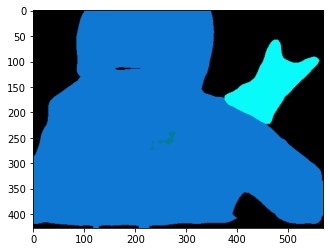

In [9]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)
# plt.show()

In [10]:
classes_file = open("voc_classes.txt", 'r')
clasess = [c.strip() for c in classes_file.readlines()]

In [11]:
clasess

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [12]:
target_class = 'cat'

In [13]:
def get_mask_by_tag(output, target_class):
  target_class = clasess.index(target_class)
  tmp = output.numpy()

  binary_mask = tmp == target_class
  binary_mask = binary_mask * 255
  return binary_mask

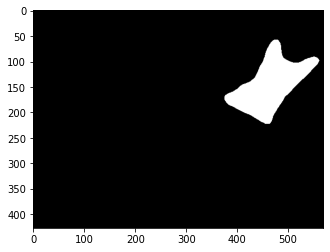

In [14]:
bin_mask = get_mask_by_tag(output_predictions, target_class)
plt.imshow(bin_mask, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


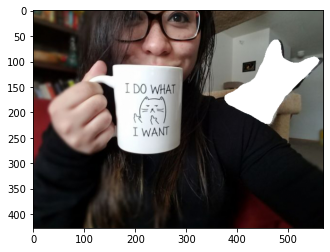

In [15]:
plt.imshow(input_image + np.expand_dims(bin_mask, axis=2))

In [16]:
import os

In [17]:
!pip3 install wldhx.yadisk-direct
clear_output()

In [18]:
!curl -L $(yadisk-direct https://disk.yandex.ru/d/xKQJZeVRk5vLlQ) -o LaMa_test_images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  118M    0  118M    0     0   9.9M      0 --:--:--  0:00:11 --:--:--  9.8M


In [19]:
!unzip LaMa_test_images.zip
clear_output()

In [32]:
pictures_with_people = ['6458524847_2f4c361183_k.png', '8399166846_f6fb4e4b8e_k.png', 
                        'alex-iby-G_Pk4D9rMLs.png', 'bench2.png', 'ferdinand-stohr-MDUlQjaAr0E.png']

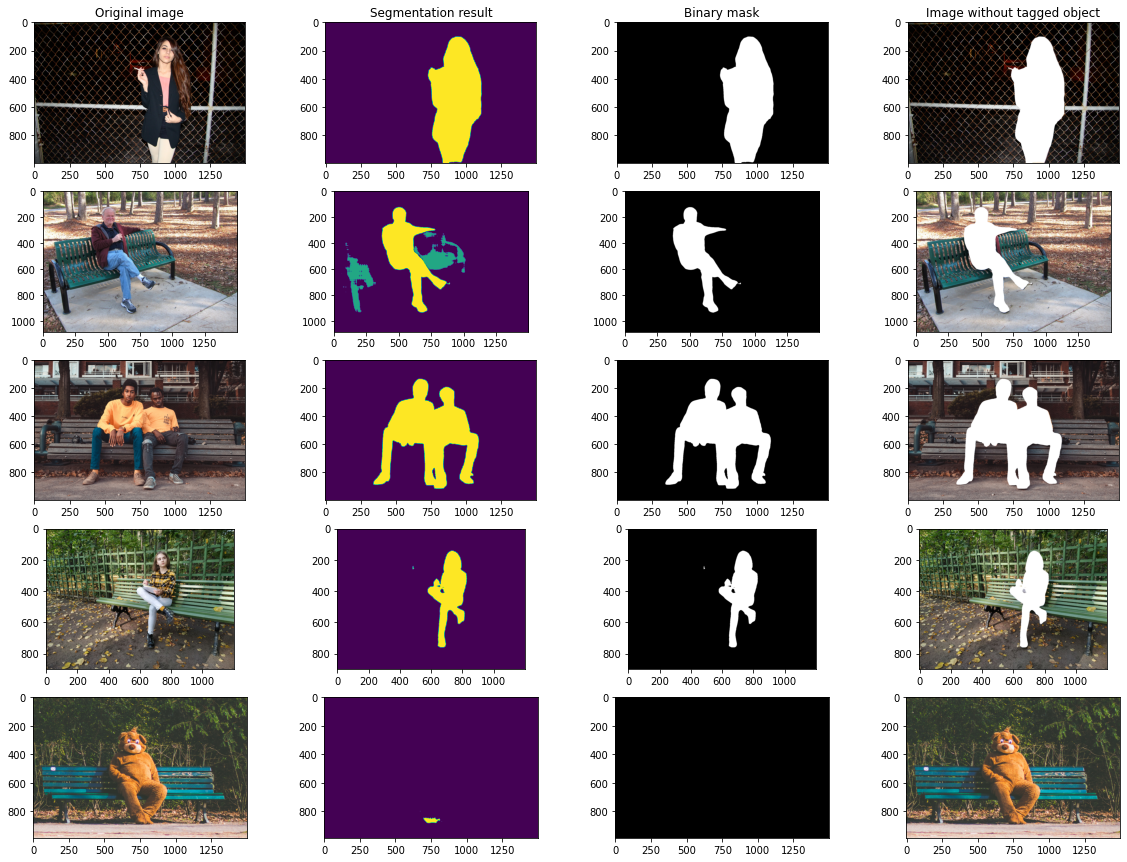

In [35]:
target_class = 'person'
fig1, axs1 = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
axs1[0,0].set_title("Original image");
axs1[0,1].set_title("Segmentation result");
axs1[0,2].set_title("Binary mask");
axs1[0,3].set_title("Image without tagged object");
for i, image in enumerate(pictures_with_people):
  input_image, output_image = segment(os.path.join("LaMa_test_images", image))
  bin_mask = get_mask_by_tag(output_image, target_class);
  axs1[i,0].imshow(np.array(input_image))
  axs1[i,1].imshow(output_image)
  axs1[i,2].imshow(bin_mask, cmap='gray')
  axs1[i,3].imshow(np.array(input_image) + np.expand_dims(bin_mask, axis=2))